<a href="https://colab.research.google.com/github/Virtualexistence/Time-Series-Forecasting-Model/blob/main/Transaction_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing Data

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from statsmodels.tsa.ar_model import AutoReg  
from sklearn.metrics import mean_squared_error as mse
from pandas.plotting import autocorrelation_plot as ap
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

In [ ]:
from sklearn.linear_model import LinearRegression as linreg

In [ ]:
import tensorflow as tf

In [ ]:
plt.style.use('bmh')
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

In [ ]:
pd.options.display.float_format = '{:.4f}'.format 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = 'drive/MyDrive/ColabFiles/'

In [ ]:
#data = pd.read_csv("drive/MyDrive/ColabFiles/txn_18.csv", parse_dates = ['txn_date'])

In [ ]:
data = pd.read_csv(path+"txn_18.csv", parse_dates = ['txn_date'])
data.drop(data[data['report_status'] == 'Saved'].index,axis=0, inplace = True)
#data.drop(data[data.report_status.isna()].index,axis=0, inplace = True)

In [ ]:
print("No. of null category cells: "+str(data.expense_category.isna().sum()))
print("Percentage: "+str(data.expense_category.isna().sum()/data.shape[0]*100)+"%")

No. of null category cells: 250330
Percentage: 17.319943985033152%


In [ ]:
data[data.payee_merchant == 'Currency Conversion'][['amount', 'report_status','description','payee_merchant','txn_type','expense_category']]

,amount,report_status,description,payee_merchant,txn_type,expense_category
11895,1.0000,NaN,Non Financial Debit Transaction,Currency Conversion,Currency Conversion Debit,NaN
14024,81.5000,NaN,Non Financial Credit Transaction,Currency Conversion,Currency Conversion Credit,NaN
14090,79.9500,NaN,Non Financial Credit Transaction,Currency Conversion,Currency Conversion Credit,NaN
14092,81.5000,NaN,Non Financial Credit Transaction,Currency Conversion,Currency Conversion Credit,NaN
14551,81.5000,NaN,Non Financial Credit Transaction,Currency Conversion,Currency Conversion Credit,NaN
...,...,...,...,...,...,...
1464923,47.3800,NaN,Non Financial Credit Transaction,Currency Conversion,Currency Conversion Credit,NaN
1464973,1.0000,NaN,Non Financial Credit Transaction,Currency Conversion,Currency Conversion Credit,NaN
1464974,86.2000,NaN,Non Financial Credit Transaction,Currency Conversion,Currency Conversion Credit,NaN
1464981,73.3300,NaN,Non Financial Credit Transaction,Currency Conversion,Currency Conversion Credit,NaN


In [ ]:
data.iloc[1485][['payee_merchant','expense_category']]

payee_merchant                        meal
expense_category    Meals and Refreshments
Name: 1725, dtype: object

In [ ]:
data[data.expense_category.isna()].description.unique()

In [ ]:
data[data.payee_merchant == 'EXGRATIA INTEREST REFUND'].value_counts('expense_category')

expense_category
Fees/ Rates and Taxes          73
Personal Expense               54
Conveyance                      9
Vehicle Expenses (Partners)     6
Executive Health Check-up       2
Meals and Refreshments          2
Communication                   1
Courier-Postage                 1
Event Expenses                  1
Membership and Subscription     1
Printing and Stationery         1
dtype: int64

In [ ]:
data[data.expense_category.isna()][['amount', 'report_status','description','payee_merchant','txn_type','expense_category']]

,amount,report_status,description,payee_merchant,txn_type,expense_category
769,63.2700,NaN,NaN,EXGRATIA INTEREST REFUND,HDFC Expense Cr,NaN
847,63.2700,NaN,NaN,Exgratia trnsfr to card ending 7371,HDFC Expense Dr,NaN
1483,2.0000,NaN,NaN,TRAVEL CLUB LOUNGE MUM,SBI Card Dr,NaN
1485,2.0000,NaN,NaN,BLR DOMESTIC LOUNGE BAN,SBI Card Dr,NaN
2183,3887.4800,NaN,NaN,OMERA FUELS Gur,SBI Card Dr,NaN
...,...,...,...,...,...,...
1464967,30000.0000,NaN,NaN,CREDIT CARD PAYMENT KASTURI NAGAR,HDFC Expense Cr,NaN
1464973,1.0000,NaN,Non Financial Credit Transaction,Currency Conversion,Currency Conversion Credit,NaN
1464974,86.2000,NaN,Non Financial Credit Transaction,Currency Conversion,Currency Conversion Credit,NaN
1464981,73.3300,NaN,Non Financial Credit Transaction,Currency Conversion,Currency Conversion Credit,NaN


In [ ]:
data.expense_category.unique()

array(['Conveyance', 'Meals and Refreshments', 'Hotel Booking Expense',
       'Communication- Headset one-time reimbursement',
       'Train and Bus Fare', 'Executive Health Check-up',
       'Fees/ Rates and Taxes', 'Employee Initiatives',
       'Books & Periodicals', 'Communication', 'Airfare Expense', 'Visa',
       'Vehicle Expenses (Partners)', 'Travel Insurance',
       'Membership and Subscription', 'Printing and Stationery',
       'Event Expenses', 'Equipment Hire Charges',
       'Incidental Expenses (Per-diem)', 'Participation Fees',
       'Courier-Postage', nan, 'Relocation Charges',
       'Guest House Expenses', 'Personal Expense', 'Continuing Education',
       'Gifts & Presents', 'International Advance Return',
       'Advance Return by Forex Card', 'Covid Vaccination Reimbursement',
       'Recovery from Salary', 'Cash Return', 'Proposal Expenses',
       'Advance Return by NEFT', 'Advance Return by Cheque'], dtype=object)

In [ ]:
data.report_status.unique()

array([nan, 'Return to update', 'In-Queue', 'Verified by Finance',
       'Pending for Audit', 'At Finance Audit', 'Partially Verified',
       'Pending for Approval', 'Data Enrichment', 'Pending at HCI',
       'Rejected', 'Held by Finance'], dtype=object)

In [ ]:
#data.drop(data[data.fraud != 'Safe'].index.values, inplace = True)

In [ ]:
np.quantile(data.amount, 0.99)

33366.05

In [ ]:
data.amount.describe()

count    1445328.0000
mean        2294.5041
std        59769.6257
min            0.0100
25%          172.0000
50%          418.0000
75%         1060.0025
max     67642376.0000
Name: amount, dtype: float64

In [ ]:
data["expense_category"].isna().sum()

250330

In [ ]:
data.groupby("expense_category")['amount'].describe().sort_values('count', ascending = False)

,count,mean,std,min,25%,50%,75%,max
expense_category,,,,,,,,
Conveyance,617508.0000,775.1115,2175.5287,0.0100,149.0500,300.1550,584.0000,424453.6300
Meals and Refreshments,272730.0000,1153.1311,5453.8896,0.0100,243.8425,454.4050,933.0000,1698675.9200
Fees/ Rates and Taxes,55194.0000,1328.3922,9286.8916,0.0100,50.0000,101.1800,600.0000,860030.0000
Communication,39148.0000,1238.4126,1642.2505,0.0100,589.0000,943.0000,1218.3100,72189.8300
Incidental Expenses (Per-diem),33620.0000,8492.1378,22895.2620,0.0100,500.0000,4500.0000,9500.0000,2500000.0000
Hotel Booking Expense,33526.0000,17723.1170,30019.7894,0.0100,4757.2650,9440.0000,19038.7500,809871.7900
Vehicle Expenses (Partners),32017.0000,5920.6705,15825.3643,0.1000,1000.0000,2926.0600,4389.4500,384916.0000
Train and Bus Fare,16687.0000,1222.8361,3859.5856,0.4000,465.8200,859.4000,1451.6100,313089.7400
Guest House Expenses,15551.0000,4202.1472,51398.9286,0.5000,367.5150,926.0000,2800.0000,6237828.0000


In [ ]:
data.groupby("city_id")['amount'].describe()

,count,mean,std,min,25%,50%,75%,max
city_id,,,,,,,,
4.0000,58.0000,6857.7997,21319.5152,9.9500,335.0500,1087.1100,3265.1650,113142.3800
12.0000,5.0000,3003.4000,2959.2543,349.0000,349.0000,1999.0000,6160.0000,6160.0000
17.0000,47537.0000,1485.3592,5419.7914,0.0900,167.0000,327.0000,858.0000,350000.0000
24.0000,1.0000,428.0000,NaN,428.0000,428.0000,428.0000,428.0000,428.0000
27.0000,22657.0000,1438.8363,5142.5817,0.0100,144.0000,323.0000,724.0000,246000.0000
...,...,...,...,...,...,...,...,...
179645.0000,43.0000,2001.1098,6481.0487,50.0000,236.0000,450.0000,875.7400,36288.0000
180008.0000,18.0000,2461.0000,3163.3094,30.0000,409.7500,697.5000,4137.0000,10440.0000
180932.0000,1.0000,1770.0000,NaN,1770.0000,1770.0000,1770.0000,1770.0000,1770.0000


In [ ]:
data.columns

Index(['Unnamed: 0', 'created_on', 'updated_on', 'is_deleted', 'txn_id',
       'description', 'txn_date', 'attached_on', 'is_fee', 'payee_merchant',
       'amount', 'currency_amount', 'approved_amount', 'currency',
       'prev_wallet', 'local_txn_id', 'parent_id', 'imported', 'iso_field',
       'limit_string', 'status', 'auth_code', 'rrn', 'stan', 'channel', 'mcc',
       'merchant_txn_id', 'pre_merchant_balance', 'curr_merchant_balance',
       'remarks', 'merchant_id', 'points', 'approved_date',
       'approval_status_id', 'category_id', 'city_id', 'country_id', 'org_id',
       'report_id', 'txn_type_id', 'user_id', 'wallet_id', 'actor_id',
       'conversion_id', 'policy_json', 'reimbursed', 'comments', 'exported_to',
       'card_id', 'end_date', 'start_date', 'exchangeable_parent_id',
       'approved_currency_amount', 'currency_link_id', 'metadata', 'source_id',
       'org_wallet_id', 'vehicle_id', 'merged_txn', 'similar_transactions_id',
       'timezone_id', 'txn_type', 

In [ ]:
#data.fraud.unique()

In [ ]:
#cities = pd.read_csv("drive/MyDrive/ColabFiles/cities_18.csv")

In [ ]:
#np.quantile(data.amount, 0.9999)

In [ ]:
#data[data.amount >= 398402.19292500144]['txn_id'].count()

In [ ]:
#data.drop(data[data.amount == max(data.amount)].index, inplace = True)

In [ ]:
#data = data.merge(cities, on = 'city_id')

In [ ]:
data = data.dropna(axis=1, how='all')
#data = data.drop(columns = ['Unnamed: 0_x','Unnamed: 0_y'])

In [ ]:
#data.head()

In [ ]:
data['date'] = data['txn_date'].dt.date

In [ ]:
#data.timezone_id.unique()

In [ ]:
#data[data.report_id.notnull()].payee_merchant.nunique()

In [ ]:
#data[data.amount == max(data.amount)]

In [ ]:
df = data.groupby('date', as_index=False)['amount'].sum()

In [ ]:
df['date'] = pd.to_datetime(df.date)

In [ ]:
df.drop(0,inplace=True)

In [ ]:
txn = data.groupby('date',as_index = False)['txn_id'].count()
txn.drop(0,inplace = True)

In [ ]:
txn['date'] = pd.to_datetime(txn.date)

# Data Analysis (Txn amount)

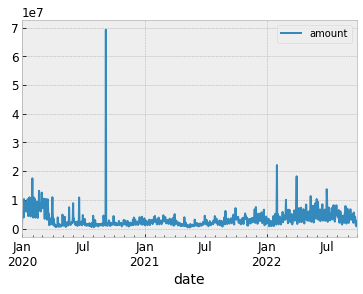

In [ ]:
df.set_index('date').plot()

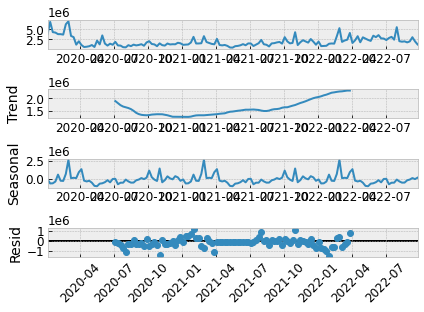

In [ ]:
time_comp = seasonal_decompose(df.set_index('date').asfreq("W"), model = 'additive')
time_comp.plot()
plt.xticks(rotation = 45);

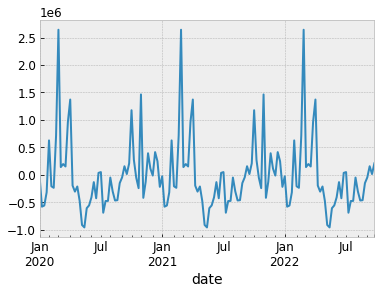

In [ ]:
time_comp.seasonal.plot() #Weekly observations

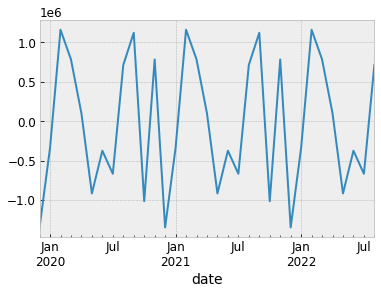

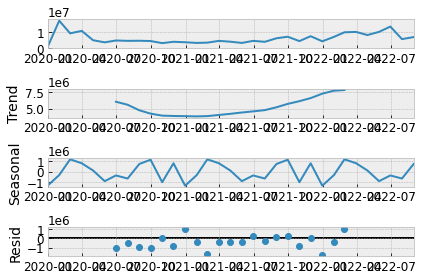

In [ ]:
time_comp = seasonal_decompose(df.set_index('date').asfreq("M"), model = 'additive')
time_comp.seasonal.plot()
time_comp.plot();

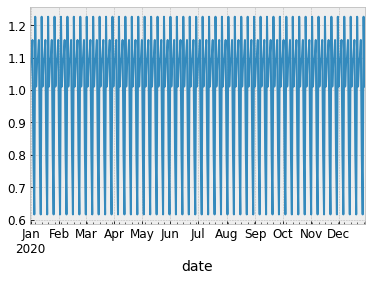

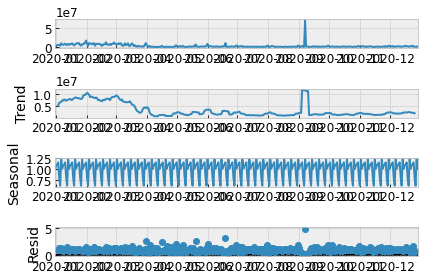

In [ ]:
time_comp = seasonal_decompose(df.set_index('date')[:365].asfreq("D"), model = 'multiplicative')
plt.xticks(rotation = 45)
time_comp.seasonal.plot()
time_comp.plot();

There's a raise and fall of 25% with the peak at Apr and fall around Jun

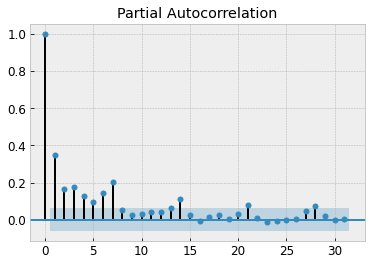

In [ ]:
plot_pacf(df.amount);

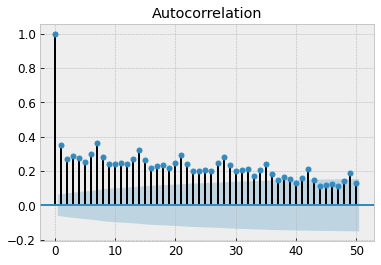

In [ ]:
plot_acf(df.amount, lags =50);

In [ ]:

X = df.set_index('date')['amount'].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.717028
p-value: 0.003880
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


#Down-sampling to Monthly data from Daily Data

In [ ]:
mon_txn =df.resample("M", on='date').sum()
#mon_txn = mon_txn['amount'].diff(periods=1).dropna()

In [ ]:
mon_dec = seasonal_decompose(mon_txn.asfreq("M"), model = 'multiplicative')

Analysing Trend

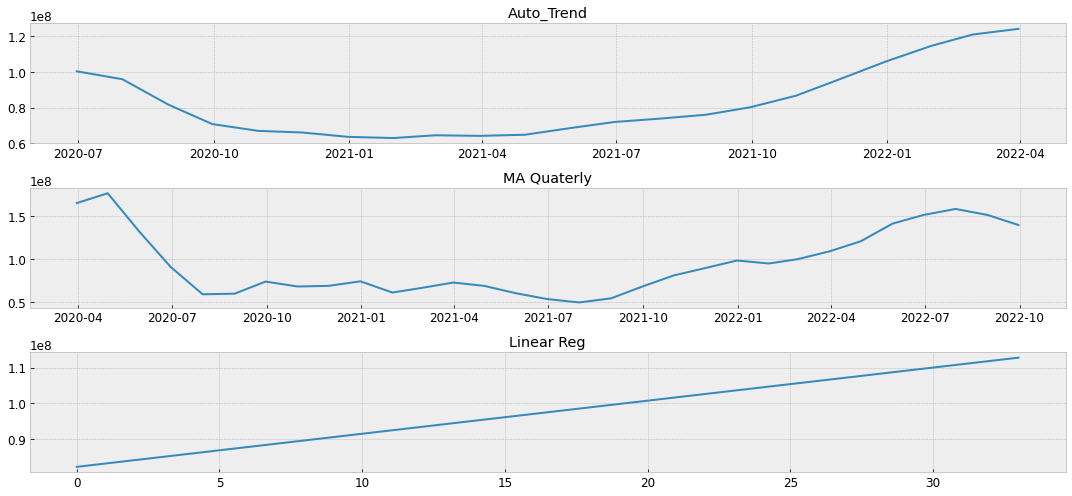

In [ ]:
fig = plt.figure(figsize=(15, 7))
layout = (3, 2)
pm_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
mv_ax = plt.subplot2grid(layout, (1, 0), colspan=2)
fit_ax = plt.subplot2grid(layout, (2, 0), colspan=2)

pm_ax.plot(mon_dec.trend)
pm_ax.set_title("Auto_Trend")

mm = mon_txn.amount.rolling(4).mean()
mv_ax.set_title('MA Quaterly')
mv_ax.plot(mm)

model = linreg()
X = range(len(mon_txn))
X = np.reshape(X, (len(X),1))
model_fit = model.fit(X, mon_txn.amount)
trend = model.predict(X)
fit_ax.plot(trend)
fit_ax.set_title("Linear Reg")

plt.tight_layout()

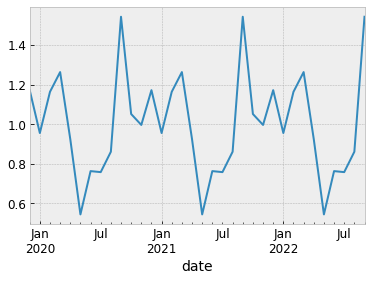

In [ ]:
mon_dec.seasonal.plot() 

Noise Check

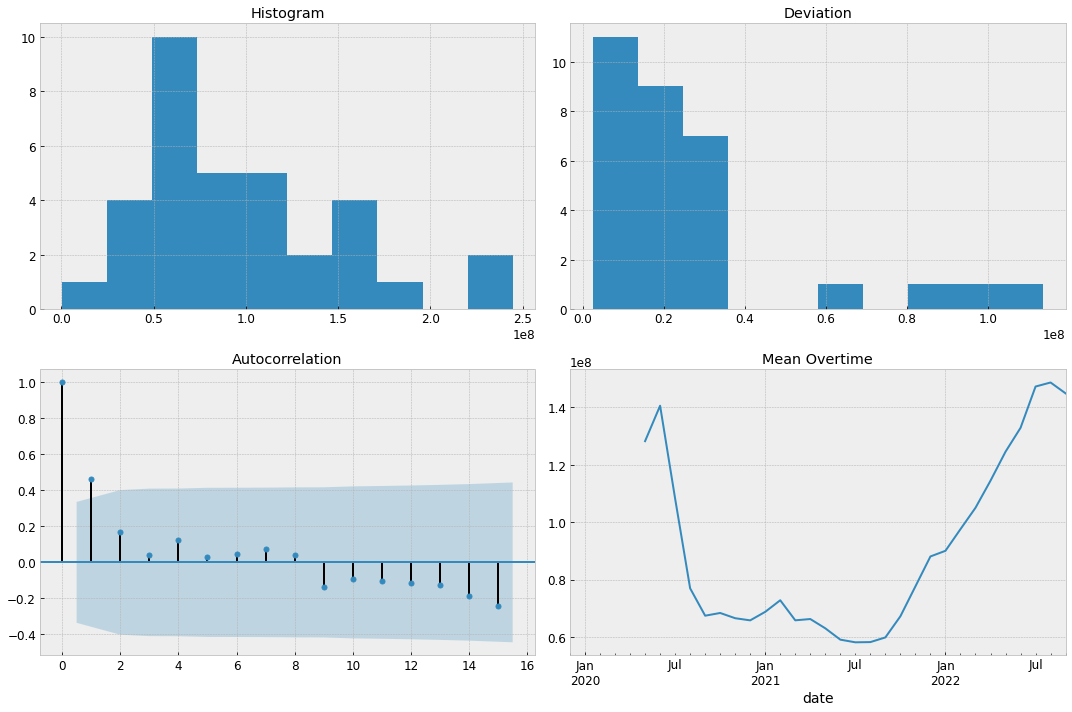

In [ ]:
fig = plt.figure(figsize=(15,10))
layout = (2, 2)
hist_ax = plt.subplot2grid(layout, (0, 0))
ac_ax = plt.subplot2grid(layout, (1, 0))
hist_std_ax = plt.subplot2grid(layout, (0, 1))
mean_ax = plt.subplot2grid(layout, (1, 1))

mon_txn.amount.hist(ax = hist_ax)
hist_ax.set_title("Histogram")

plot_acf(mon_txn, lags = 15, ax=ac_ax)
ac_ax.set_title("Autocorrelation")

mm = mon_txn.amount.rolling(4).std()
mm.hist(ax=hist_std_ax)
hist_std_ax.set_title("Deviation")

mm = mon_txn.amount.rolling(6).mean()
mm.plot(ax=mean_ax)
mean_ax.set_title("Mean Overtime")

plt.tight_layout()

Doesn't follow normal distribution so not a white noise data

In [ ]:
X = mon_txn.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.588659
p-value: 0.005982
Critical Values:
	1%: -3.646
	5%: -2.954
	10%: -2.616


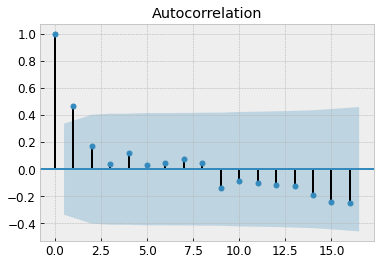

In [ ]:
plot_acf(mon_txn);

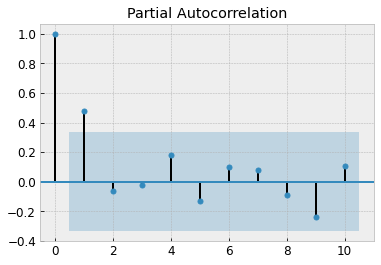

In [ ]:
plot_pacf(mon_txn, lags = 10);

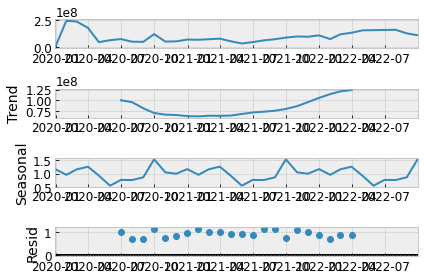

In [ ]:
time_comp = seasonal_decompose(mon_txn, model='multiplicative')
time_comp.plot();

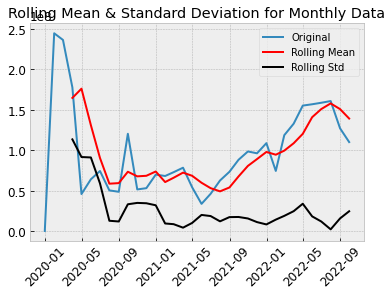

In [ ]:
rolmean = mon_txn.rolling(window=4).mean()
rolstd = mon_txn.rolling(window=4).std()

# Plot rolling statistics:
orig = plt.plot(mon_txn, label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for Monthly Data')
plt.xticks(rotation = 45)
plt.show(block=False)

#Data Analysis (No. of Txns)

In [ ]:
txn.set_index('date', inplace = True)

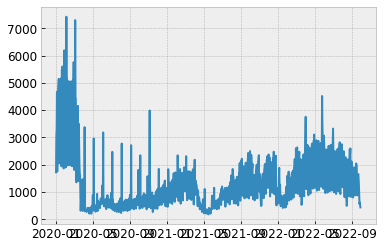

In [ ]:
plt.plot(txn.txn_id)

In [ ]:
txn_com = seasonal_decompose(txn.txn_id.asfreq("D"), model = 'multiplicative')

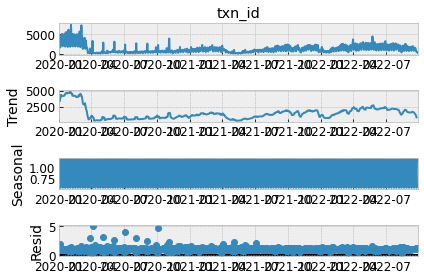

In [ ]:
txn_com.plot();

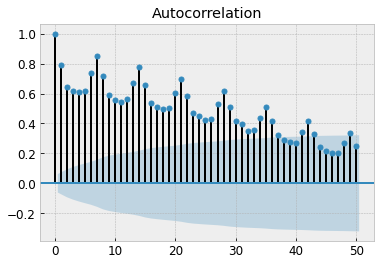

In [ ]:
plot_acf(txn.txn_id, lags=50);

#Down-sampled to Monthly Data

In [ ]:
mon_count =txn.resample("M", on='date').sum()
mon_count

,txn_id
date,
2020-01-31,132151
2020-02-29,122269
2020-03-31,68964
2020-04-30,14488
2020-05-31,18744
2020-06-30,22234
2020-07-31,18154
2020-08-31,19236
2020-09-30,22995


In [ ]:
mon_count_dec = seasonal_decompose(mon_count.asfreq("M"), model = 'Multiplicative')

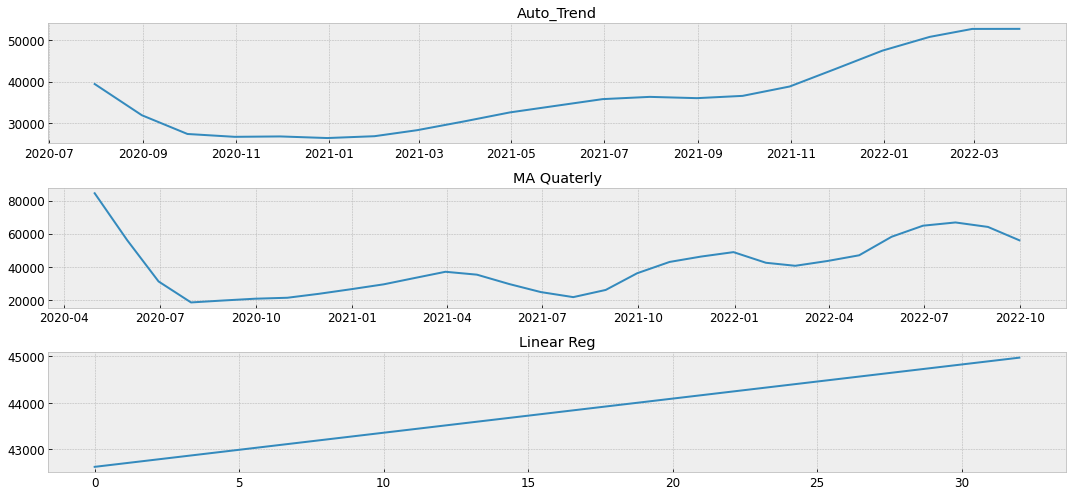

In [ ]:
fig = plt.figure(figsize=(15, 7))
layout = (3, 2)
pm_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
mv_ax = plt.subplot2grid(layout, (1, 0), colspan=2)
fit_ax = plt.subplot2grid(layout, (2, 0), colspan=2)

pm_ax.plot(mon_count_dec.trend)
pm_ax.set_title("Auto_Trend")

mm = mon_count.txn_id.rolling(4).mean()
mv_ax.set_title('MA Quaterly')
mv_ax.plot(mm)

model = linreg()
X = range(len(mon_count))
X = np.reshape(X, (len(X),1))
model_fit = model.fit(X, mon_count.txn_id)
trend = model.predict(X)
fit_ax.plot(trend)
fit_ax.set_title("Linear Reg")

plt.tight_layout()

#Forecast Modeling

In [ ]:
results = {}
prediction = {}

Naive Model

Two years and 5 months of training data and 4 months of test data

In [ ]:
naive = mon_txn.copy()
naive['lag'] = naive.shift(1)
train = naive.iloc[:-4]
test = naive.iloc[-4:]

Text(0.5, 1.0, 'Naive (Lag) plot')

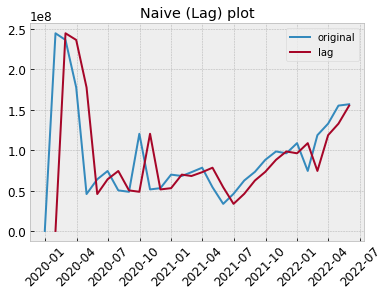

In [ ]:
train_x, train_y = train.amount, train.lag
test_x, test_y = test.amount, test.lag
plt.plot(train_x, label = 'original')
plt.plot(train_y, label = 'lag')
plt.legend()
plt.xticks(rotation = 45)
plt.title("Naive (Lag) plot")

In [ ]:
prediction['naive'] = train_y
results['naive_error'] = np.sqrt(mse(test_y, test_x))
print(results['naive_error'])

18908527.58099717


Auto-Regressive (AR)

In [ ]:
train, test = mon_txn.iloc[:int(mon_txn.shape[0]*0.9)], mon_txn.iloc[int(mon_txn.shape[0]*0.9):]
AR_data=train
predict=[]
for t in range(len(test)):
  model=AutoReg(AR_data, lags = 1)
  model_fit=model.fit()
  y=model_fit.predict(start=len(AR_data), end=len(train)+len(test)-1)
  print(y.values[0])
  predict.append(y.values[0])
  AR_data= np.append(AR_data,t)
  AR_data = pd.Series(AR_data)

123365264.85406888
61347014.844293825
54490507.2621313
49012570.949249156


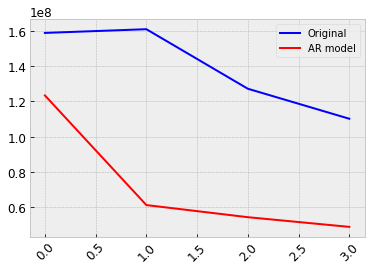

In [ ]:
plt.plot(test.amount.values, color='b', label = 'Original')
plt.plot(predict, color='r', label = "AR model")
plt.xticks(rotation = 45)
plt.legend()

ARIMA walk forward 

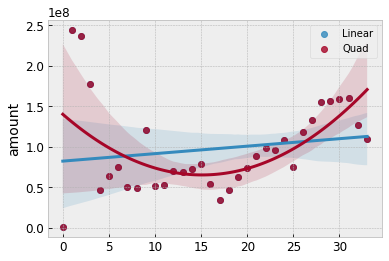

In [ ]:
sns.regplot(x= mon_txn.reset_index().index.values, y=mon_txn.amount, order = 1, label = 'Linear')
sns.regplot(x= mon_txn.reset_index().index.values, y=mon_txn.amount, order = 2, label = "Quad")
plt.legend()

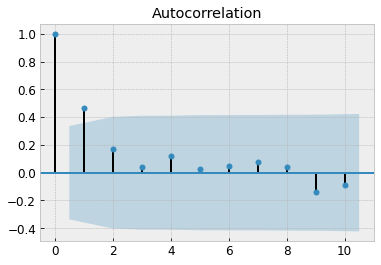

In [ ]:
plot_acf(mon_txn.amount,lags=10);

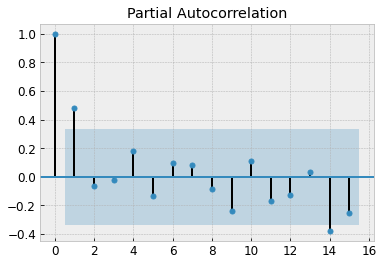

In [ ]:
plot_pacf(mon_txn.amount, lags=15);

#ARIMA

In [ ]:
train, test = mon_txn.iloc[:int(mon_txn.shape[0]*0.9)], mon_txn.iloc[int(mon_txn.shape[0]*0.9):]
ARIMA_data=train
predict=[]
for t in test.values:
  model=ARIMA(ARIMA_data, order = (1,1,2))
  model_fit=model.fit()
  y=model_fit.predict(start=len(ARIMA_data), end=len(test)+len(train)-1)
  print(y.values[0])
  predict.append(y.values[0])
  ARIMA_data = np.append(ARIMA_data,t) 
  ARIMA_data = pd.Series(ARIMA_data)

118741565.98770502
124634281.65078846
127298558.5253919
104296443.05382253


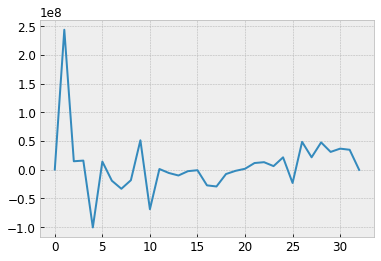

In [ ]:
model_fit.resid.plot()

In [ ]:
prediction['ARIMA'] = model_fit.predict()
results['ARIMA'] = np.sqrt(mse(test.amount.values, predict))
results['ARIMA']<results['naive_error'] #ARIMA model

False

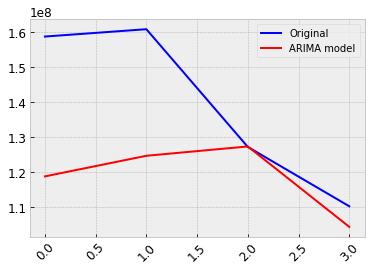

In [ ]:
plt.plot(test.amount.values, color='b', label = 'Original')
plt.plot(predict, color='r', label = "ARIMA model")
plt.xticks(rotation = 45)
plt.legend()

#SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

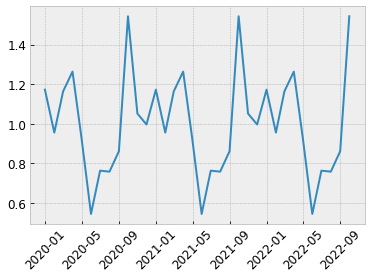

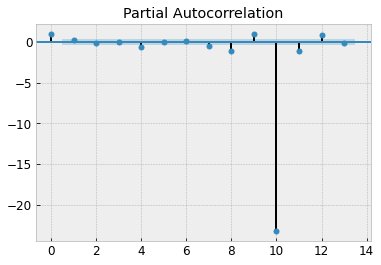

In [ ]:
season_data = seasonal_decompose(mon_txn.asfreq("M"), model='multiplicative').seasonal
plt.plot(season_data)
plt.xticks(rotation=45)
plot_pacf(season_data, lags=13);

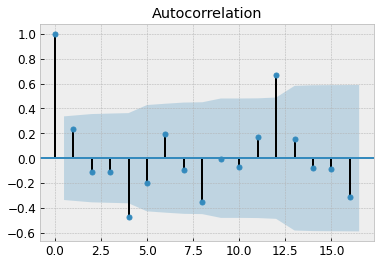

In [ ]:
plot_acf(season_data);

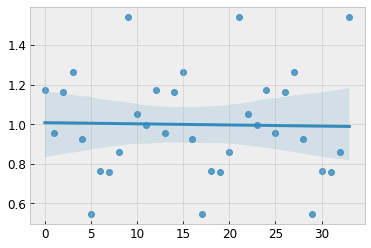

In [ ]:
sns.regplot(x=season_data.reset_index().index.values,y = season_data.values)

In [ ]:
mon_pred = -4
train, test = mon_txn.iloc[:mon_pred], mon_txn.iloc[mon_pred:]
test

,amount
date,
2022-06-30,158739775.5100
2022-07-31,160840121.7400
2022-08-31,127162032.4000
2022-09-30,110189560.0300


In [ ]:
SARIMA_data=train
predict = []
model=SARIMAX(SARIMA_data, order = (1,2,1),seasonal_order = (1,0,2,12) )
model_fit=model.fit()
#y=pd.DataFrame(model_fit.forecast(4))
y=pd.DataFrame(mode_fit.pre)
fitter_y = pd.DataFrame(model_fit.predict())

In [ ]:
fitter_y

,predicted_mean
date,
2019-12-31,0.0000
2020-01-31,651758.0525
2020-02-29,339191532.2436
2020-03-31,288578232.3770
2020-04-30,204883019.9012
2020-05-31,42299060.7849
2020-06-30,74027239.4703
2020-07-31,83776525.4001
2020-08-31,53786404.5221


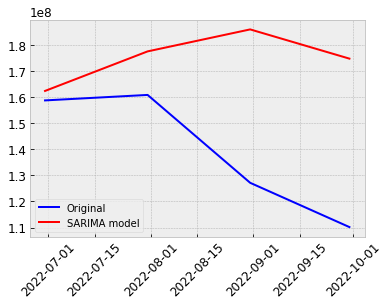

In [ ]:
plt.plot(test.amount, color='b', label = 'Original')
plt.plot(y, color='r', label = "SARIMA model")
plt.xticks(rotation = 45)
plt.legend()

In [ ]:
prediction['SARIMA'] = y.values
results["SARIMA"] = np.sqrt(mse(test, y))

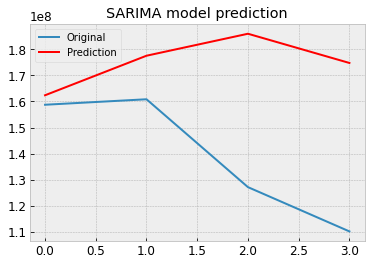

In [ ]:
plt.plot(test.amount.values, label = 'Original')
plt.plot(prediction['SARIMA'], color='r', label = 'Prediction')
plt.title("SARIMA model prediction")
plt.legend() 

#Statistic predictions

In [ ]:
prediction

{'naive': date
 2019-12-31              NaN
 2020-01-31      424630.6000
 2020-02-29   244538820.9700
 2020-03-31   236318368.0500
 2020-04-30   177675425.1900
 2020-05-31    46017227.8600
 2020-06-30    64223725.4100
 2020-07-31    74473393.2900
 2020-08-31    50506574.5600
 2020-09-30    48803229.6000
 2020-10-31   120442664.8400
 2020-11-30    51711416.2900
 2020-12-31    53267297.0600
 2021-01-31    69999042.7500
 2021-02-28    68296626.7500
 2021-03-31    73006220.0600
 2021-04-30    78528864.8200
 2021-05-31    54408981.5400
 2021-06-30    33874138.3800
 2021-07-31    46298549.3000
 2021-08-31    62743675.2200
 2021-09-30    73460991.3700
 2021-10-31    88277095.1100
 2021-11-30    98605187.8600
 2021-12-31    96317520.4900
 2022-01-31   108855259.1400
 2022-02-28    74548441.2700
 2022-03-31   118709464.4400
 2022-04-30   132924326.0700
 2022-05-31   155237280.4700
 Freq: M, Name: lag, dtype: float64, 'ARIMA': 0            0.0000
 1       393756.0161
 2    221415794.7334
 3    1

AttributeError: ignored

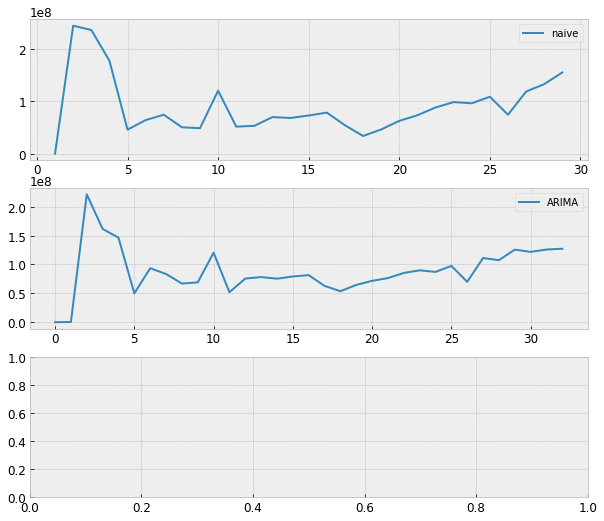

In [ ]:
fig = plt.figure(figsize=(10, 15))
layout = (5, 1)
x=0
for i in prediction.keys():
  plt.subplot2grid(layout, (x, 0)).plot(prediction[i].values, label = i)
  plt.legend()
  x+=1

plt.tight_layout()

In [ ]:
sns.barplot(x = list(results.keys()), y=list(results.values()))
plt.title("RMSE of statistical models")
plt.xticks(rotation = 45)

#ML models

In [ ]:
from sklearn import linear_model, svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
import lightgbm as lgb

In [ ]:
import xgboost as xgb 
from sklearn.metrics import mean_squared_error

In [ ]:
#df.drop(0, inplace=True)

In [ ]:
def create_time_features(df):
    """
    Creates time series features from datetime index
    """
    df = df.copy()
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day

    return df

In [ ]:
split = '2022-05-31'
train = df.set_index('date').iloc[:-120]
test = df.set_index('date').iloc[-120:]
train = create_time_features(train)
test = create_time_features(test)

In [ ]:
train.tail()

,amount,date,dayofweek,quarter,month,year,dayofyear,dayofmonth
date,,,,,,,,
2022-05-27,8798546.2000,2022-05-27,4,2,5,2022,147,27
2022-05-28,4661158.8100,2022-05-28,5,2,5,2022,148,28
2022-05-29,3416954.2900,2022-05-29,6,2,5,2022,149,29
2022-05-30,4789325.4800,2022-05-30,0,2,5,2022,150,30
2022-05-31,10269884.2700,2022-05-31,1,2,5,2022,151,31


In [ ]:
#X_train = train.index.values
#y_train = train.amount.values
#X_test = test.index.values
#y_train = test.amount.values

In [ ]:
features = ['dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth']
target = 'amount'
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]

In [ ]:
reg = xgb.XGBRegressor(n_estimators = 2000,objective='reg:squarederror', early_stopping_rounds = 50,
                       learning_rate = 0.001)
reg.fit(X_train, y_train,
        eval_set=[(X_train,y_train), (X_test, y_test)], verbose = 1000)


[0]	validation_0-rmse:4.52243e+06	validation_1-rmse:5.03709e+06
[1000]	validation_0-rmse:3.04901e+06	validation_1-rmse:2.37926e+06
[1999]	validation_0-rmse:2.73486e+06	validation_1-rmse:1.79731e+06


XGBRegressor(early_stopping_rounds=50, learning_rate=0.001, n_estimators=2000,
             objective='reg:squarederror')

In [ ]:
fi = pd.DataFrame(data = reg.feature_importances_, index = features, columns = ['Importance'])

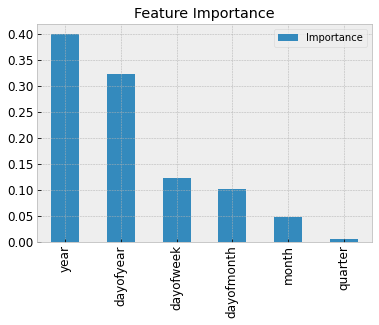

In [ ]:
fi.sort_values('Importance', ascending = False).plot(kind = 'bar', title = 'Feature Importance')

In [ ]:
xgm = reg.predict(create_time_features(test.set_index('date'))[features])
xgm = {'date':test.date.values, 'result': xgm}
xgm = pd.DataFrame(xgm)
xgm = xgm.resample("M", on = 'date')

In [ ]:
xgm = xgm.sum()

In [ ]:
xgm

,result
date,
2022-06-30,118246720.0000
2022-07-31,120666608.0000
2022-08-31,124308024.0000
2022-09-30,109434416.0000


In [ ]:
fxgm = reg.predict(X_train)
fxgm = {'date':train.date.values, 'result': fxgm}
fxgm = pd.DataFrame(fxgm)
fxgm = fxgm.resample("M", on = 'date').sum()

In [ ]:
fxgm

,result
date,
2019-12-31,2022238.8750
2020-01-31,185462736.0000
2020-02-29,168529904.0000
2020-03-31,156595216.0000
2020-04-30,56626552.0000
2020-05-31,56743736.0000
2020-06-30,55005848.0000
2020-07-31,57707740.0000
2020-08-31,56713252.0000


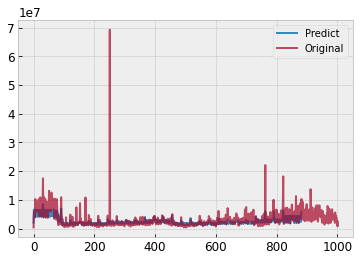

In [ ]:
plt.plot(reg.predict(create_time_features(train.set_index('date'))[features]),label = 'Predict')
plt.plot(df.amount, label = "Original", alpha = 0.7)
plt.legend()

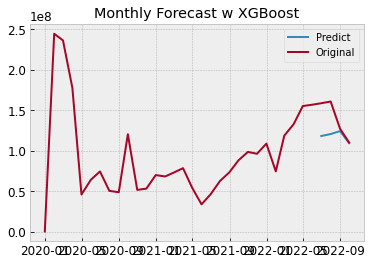

In [ ]:
plt.plot(xgm.result, label = "Predict")
plt.plot(mon_txn.amount, label = "Original")
plt.title("Monthly Forecast w XGBoost")
plt.legend()

In [ ]:
X_test['XGBoost'] = reg.predict(X_test)
mm = X_test.reset_index().resample("M", on = 'date').sum()
y_test = pd.DataFrame(y_test.reset_index())
y_test = y_test.resample("M", on='date').sum()

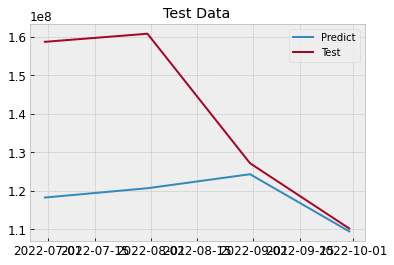

In [ ]:
plt.plot(mm.XGBoost, label="Predict")
plt.plot(y_test.amount, label="Test")
plt.title("Test Data")
plt.legend()

In [ ]:
xgm

,result
date,
2022-06-30,118246720.0000
2022-07-31,120666608.0000
2022-08-31,124308024.0000
2022-09-30,109434416.0000


In [ ]:
train, test = mon_txn.iloc[:mon_pred], mon_txn.iloc[mon_pred:]
results['XGBoost'] = np.sqrt(mean_squared_error(test.amount.values
,xgm.result))
prediction['XGB'] = xgm.result.values
print(results['XGBoost'])

28558336.59900041


Lightgbm

In [ ]:
def create_time_features(df):
    """
    Creates time series features from datetime index
    """
    df = df.copy()
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df.drop(columns = ['date'], inplace = True)
    return df

In [ ]:
X_train_df = create_time_features(train)
X_test_df = create_time_features(test)
X_train_df.reset_index(drop=True, inplace = True)
X_test_df.reset_index(drop=True, inplace = True)
y_train = X_train_df['amount']
X_train_df = X_train_df.drop(['amount'], axis=1)
y_test = X_test_df['amount']
X_test_df = X_test_df.drop(['amount'], axis=1)

In [ ]:
lightGBM = lgb.LGBMRegressor()
lightGBM.fit(X_train_df, y_train)
yhat = lightGBM.predict(X_test_df)

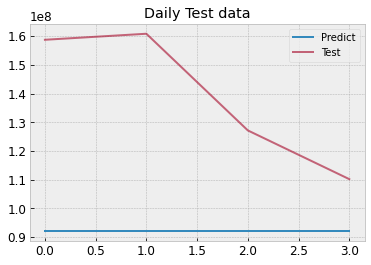

In [ ]:
plt.plot(yhat, label="Predict")
plt.plot(y_test, label="Test", alpha = 0.6)
plt.title("Daily Test data")
plt.legend()

In [ ]:
#test = df.copy() 

In [ ]:
test['LGBM'] = yhat

In [ ]:
lg = test.resample("M", on='date').sum()

KeyError: ignored

In [ ]:
plt.plot(lg.amount.values, label='Original')
plt.plot(lg.LGBM.values, label="Predicted")
plt.title("Monthly Test Data")
plt.legend()

In [ ]:
prediction['LGBM'] = yhat

In [ ]:
results['LGBM'] = np.sqrt(mse(lg.amount.values, lg.LGBM.values))
print(results['LGBM'])

#Merger

In [ ]:
models = ['XGB', 'SARIMA']
pred = {}
for i in models:
  pred[i] = prediction[i]
predictiondata = pd.DataFrame()
for i in models:
  predictiondata[i] = pred[i]
predictiondata.fillna(0, inplace = True)
predictiondata['SARIMA+XGB Model'] = (predictiondata['SARIMA'] + predictiondata['XGB'])/2 

In [ ]:
pred['XGB']

array([1.16553136e+08, 1.18885528e+08, 1.22705232e+08, 1.07858104e+08],
      dtype=float32)

In [ ]:
predictiondata

,XGB,SARIMA,SARIMA+XGB Model
0,118246720.0,1.623729e+08,1.403098e+08
1,120666608.0,1.775280e+08,1.490973e+08
2,124308024.0,1.859521e+08,1.551301e+08
3,109434416.0,1.747527e+08,1.420935e+08


In [ ]:
results['SARIMA+XGB'] = np.sqrt(mean_squared_error(test.amount.values, predictiondata["SARIMA+XGB Model"]))

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

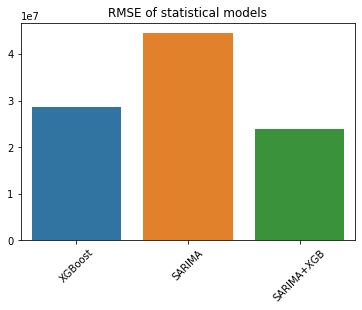

In [ ]:
sns.barplot(x = list(results.keys()), y=list(results.values()))
plt.title("RMSE of statistical models")
plt.xticks(rotation = 45)

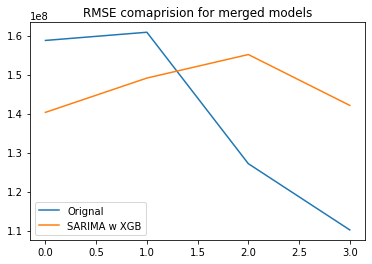

In [ ]:
plt.plot(test.amount.values, label = 'Orignal')
plt.plot(predictiondata['SARIMA+XGB Model'].values[-5:], label = 'SARIMA w XGB')
#plt.plot(predictiondata['SARIMA+XGB+ARIMA Model'].values[-5:], label = "Mixed Model")
plt.title("RMSE comaprision for merged models")
plt.legend()

In [ ]:
train

,amount
date,
2020-01-31,244538820.9700
2020-02-29,236318368.0500
2020-03-31,177675425.1900
2020-04-30,46017227.8600
2020-05-31,64223725.4100
2020-06-30,74473393.2900
2020-07-31,50506574.5600
2020-08-31,48803229.6000
2020-09-30,120442664.8400


In [ ]:
fxgm['s']=fitter_y.values
fxgm

,result,s
date,,
2019-12-31,2.022239e+06,0.000000e+00
2020-01-31,1.854627e+08,6.517581e+05
2020-02-29,1.685299e+08,3.391915e+08
2020-03-31,1.565952e+08,2.885782e+08
2020-04-30,5.662655e+07,2.048830e+08
2020-05-31,5.674374e+07,4.229906e+07
2020-06-30,5.500585e+07,7.402724e+07
2020-07-31,5.770774e+07,8.377653e+07
2020-08-31,5.671325e+07,5.378640e+07


In [ ]:
model = linreg()
model_fit = model.fit(fxgm[['result','s']].values, train.values)

In [ ]:
predictiondata.set_index(test.index.values, inplace=True)

In [ ]:
train

,amount
date,
2019-12-31,4.246306e+05
2020-01-31,2.445388e+08
2020-02-29,2.363184e+08
2020-03-31,1.776754e+08
2020-04-30,4.601723e+07
2020-05-31,6.422373e+07
2020-06-30,7.447339e+07
2020-07-31,5.050657e+07
2020-08-31,4.880323e+07


In [ ]:
predictiondata

,XGB,SARIMA,SARIMA+XGB Model,Linear_Fit
2022-06-30,118246720.0,1.623729e+08,1.403098e+08,1.467054e+08
2022-07-31,120666608.0,1.775280e+08,1.490973e+08,1.502091e+08
2022-08-31,124308024.0,1.859521e+08,1.551301e+08,1.553337e+08
2022-09-30,109434416.0,1.747527e+08,1.420935e+08,1.346401e+08


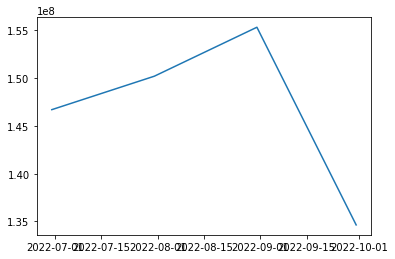

In [ ]:
plt.plot(predictiondata['Linear_Fit'], label = 'Forecast prediction')

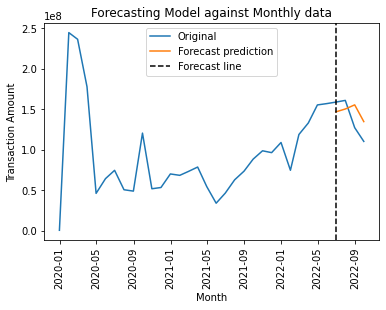

In [ ]:
predictiondata['Linear_Fit'] = model_fit.predict(predictiondata[['XGB','SARIMA']].values)
plt.plot(mon_txn.amount, label = "Original")
plt.plot(predictiondata['Linear_Fit'], label = 'Forecast prediction')
plt.axvline(x = pd.to_datetime('2022-06-30'), color = 'black', label = 'Forecast line', linestyle = '--')
plt.title("Forecasting Model against Monthly data")
plt.xticks(rotation = 90)
plt.xlabel("Month")
plt.ylabel("Transaction Amount")
plt.legend()

In [ ]:
predictiondata["Org"] = test.amount.values
predictiondata

,XGB,SARIMA,SARIMA+XGB Model,Linear_Fit,Org
2022-06-30,118246720.0,1.623729e+08,1.403098e+08,1.467054e+08,1.587398e+08
2022-07-31,120666608.0,1.775280e+08,1.490973e+08,1.502091e+08,1.608401e+08
2022-08-31,124308024.0,1.859521e+08,1.551301e+08,1.553337e+08,1.271620e+08
2022-09-30,109434416.0,1.747527e+08,1.420935e+08,1.346401e+08,1.101896e+08


In [ ]:

from google.colab import files
predictiondata.to_csv("Amount_Forecast.csv")
files.download('Amount_Forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
results["LR"] = np.sqrt(mean_squared_error(test.amount.values,predictiondata['Linear_Fit'].values))

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

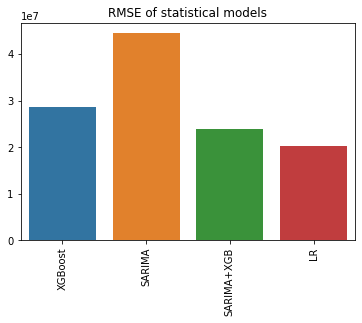

In [ ]:
sns.barplot(x = list(results.keys()), y=list(results.values()))
plt.title("RMSE of statistical models")
plt.xticks(rotation = 90)

#No. of txn Forecast

9440.468605953838


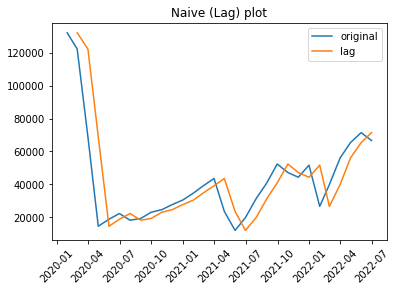

In [ ]:
results = {}
prediction = {}
start = '2022-06'
naive = mon_count.copy()
naive['lag'] = naive.shift(1)
train = naive.loc[:start]
test = naive.loc[start:]
train_x, train_y = train.txn_id, train.lag
test_x, test_y = test.txn_id, test.lag
plt.plot(train_x, label = 'original')
plt.plot(train_y, label = 'lag')
plt.legend()
plt.xticks(rotation = 45)
plt.title("Naive (Lag) plot")
prediction['naive'] = train_y
results['naive_error'] = np.sqrt(mse(test_y, test_x))
print(results['naive_error'])

In [ ]:
train, test = mon_count.iloc[:int(mon_count.shape[0]*0.9)], mon_count.iloc[int(mon_count.shape[0]*0.9):]
SARIMA_data=train
model=SARIMAX(SARIMA_data, order = (1,2,1),seasonal_order = (1,0,2,12) )
model_fit=model.fit()
tot_pred = model_fit.predict()
y=model_fit.forecast(4)

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


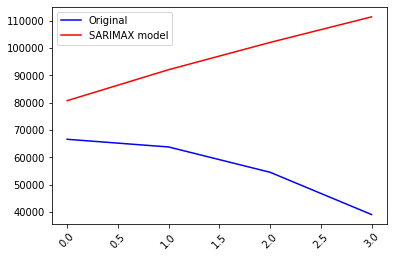

In [ ]:
plt.plot(test.txn_id.values, color='b', label = 'Original')
plt.plot(y.values, color='r', label = "SARIMAX model")
plt.xticks(rotation = 45)
plt.legend()

In [ ]:
print(np.sqrt(mse(test.txn_id.values, y.values)))
results['SARIMAX'] = np.sqrt(mse(test.txn_id.values, y.values))
prediction['SARIMAX'] = y.values


46115.62017491017


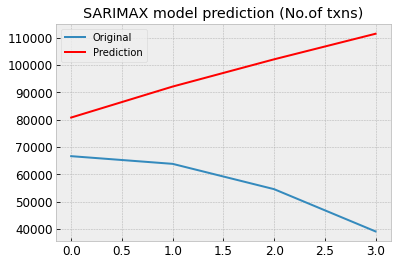

In [ ]:
plt.plot(test.txn_id.values, label = 'Original')
plt.plot(prediction['SARIMAX'].values, color='r', label = 'Prediction')
plt.title("SARIMAX model prediction (No.of txns)")
plt.legend()

#XG-Boost 

In [ ]:
import xgboost as xgb 
from sklearn.metrics import mean_squared_error

In [ ]:
def create_time_features(df):
    """
    Creates time series features from datetime index
    """
    df = df.copy()
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day

    return df

In [ ]:
txn.set_index('date', inplace=True)

In [ ]:
train = txn.iloc[:-120]
test = txn.iloc[-120:]
train = create_time_features(train)
test = create_time_features(test)
features = ['dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth']
target = 'txn_id'
X_train = train[features]
y_train = train[target]
X_test = test[features]
y_test = test[target]
reg = xgb.XGBRegressor(n_estimators = 2000,objective='reg:squarederror', early_stopping_rounds = 50,
                       learning_rate = 0.001)
reg.fit(X_train, y_train,
        eval_set=[(X_train,y_train), (X_test, y_test)], verbose = 1000)

[0]	validation_0-rmse:1795.51	validation_1-rmse:1992.61
[1000]	validation_0-rmse:834.604	validation_1-rmse:772.85
[1999]	validation_0-rmse:543.911	validation_1-rmse:493.21


XGBRegressor(early_stopping_rounds=50, learning_rate=0.001, n_estimators=2000,
             objective='reg:squarederror')

In [ ]:
xgm = reg.predict(X_test)
xgm = {'date':test.index.values, 'result': xgm}
xgm = pd.DataFrame(xgm)
xgm = xgm.resample("M", on = 'date')

In [ ]:
xgm = xgm.sum()

In [ ]:
cxgm = reg.predict(X_train)
cxgm = {'date':train.index.values, 'result': cxgm}
cxgm = pd.DataFrame(cxgm)
cxgm = cxgm.resample("M", on = 'date').sum()

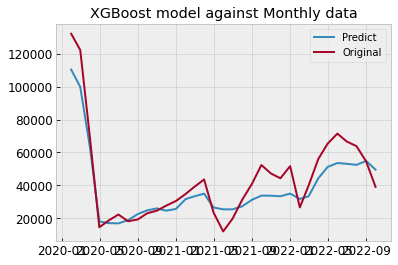

In [ ]:
plt.plot(xgm.result, label = "Predict")
plt.plot(mon_count.txn_id, label = "Original")
plt.title("XGBoost model against Monthly data")
plt.legend()

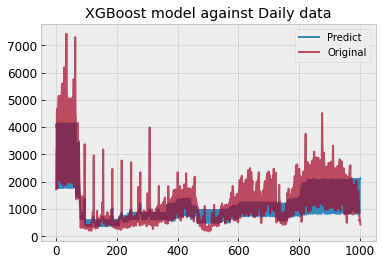

In [ ]:
plt.plot(reg.predict(create_time_features(txn)[features]),label = 'Predict')
plt.plot(txn.txn_id.values, label = "Original", alpha = 0.7)
plt.title("XGBoost model against Daily data")
plt.legend()

In [ ]:
X_test['XGBoost'] = reg.predict(X_test)
mm = X_test.reset_index().resample("M", on = 'date').sum()
y_test = pd.DataFrame(y_test.reset_index())
y_test = y_test.resample("M", on='date').sum()

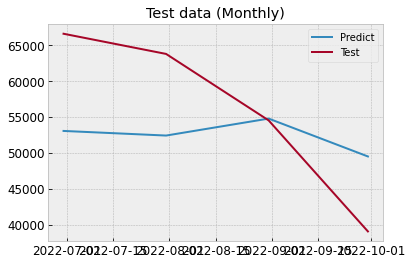

In [ ]:
plt.plot(mm.XGBoost, label="Predict")
plt.plot(y_test.txn_id, label="Test")
plt.title("Test data (Monthly)")
plt.legend()

In [ ]:
train, test = mon_count.iloc[:int(mon_count.shape[0]*0.9)], mon_count.iloc[int(mon_count.shape[0]*0.9):]
results['XGBoost'] = np.sqrt(mean_squared_error(test.txn_id
,xgm.result))
prediction['XGB'] = xgm.result.values
print(results['XGBoost'])

10335.995615871321


#Merge (No.of txns)

In [ ]:
models = ['XGB', 'SARIMAX']
pred = {}
for i in models:
  pred[i] = prediction[i]
pred_data = pd.DataFrame()
for i in models:
  pred_data[i] = pred[i]
pred_data.fillna(0, inplace = True)
pred_data['SARIMAX+XGB Model'] = (pred_data['SARIMAX'] + pred_data['XGB'])/2 

In [ ]:
pred_data

,XGB,SARIMAX,SARIMAX+XGB Model
0,52920.941406,80773.040286,66846.990846
1,52277.328125,92119.721044,72198.524585
2,54641.164062,102099.951015,78370.557539
3,49383.164062,111468.290194,80425.727128


In [ ]:
results['SARIMAX+XGB'] = np.sqrt(mean_squared_error(test.txn_id.values, pred_data["SARIMAX+XGB Model"]))

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

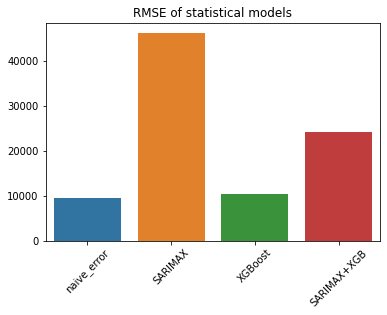

In [ ]:
sns.barplot(x = list(results.keys()), y=list(results.values()))
plt.title("RMSE of statistical models")
plt.xticks(rotation = 45)

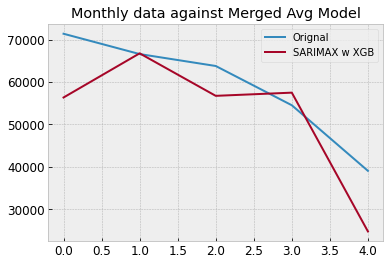

In [ ]:
plt.plot(mon_count.txn_id.values[-5:], label = 'Orignal')
plt.plot(pred_data['SARIMAX+XGB Model'].values[-5:], label = 'SARIMAX w XGB')
plt.title("Monthly data against Merged Avg Model")
plt.legend()

In [ ]:
cxgm['s'] = tot_pred.values

In [ ]:
pred_data

,XGB,SARIMAX,SARIMAX+XGB Model,Liner_Reg
date,,,,
2022-06-30,52920.941406,80773.040286,66846.990846,63812.569115
2022-07-31,52277.328125,92119.721044,72198.524585,63357.929250
2022-08-31,54641.164062,102099.951015,78370.557539,66574.236671
2022-09-30,49383.164062,111468.290194,80425.727128,60365.188731


In [ ]:
model = linreg()
model_fit = model.fit(cxgm[['result','s']].values, train.values)

In [ ]:
pred_data.set_index(test.index, inplace = True)

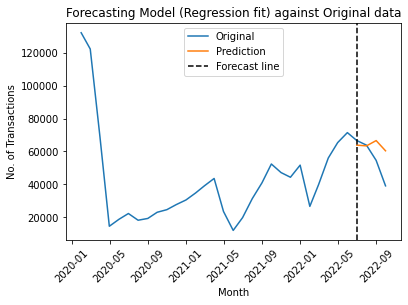

In [ ]:
pred_data['Liner_Reg'] = model_fit.predict(pred_data[['XGB','SARIMAX']])
plt.plot(mon_count.txn_id, label = "Original")
plt.plot(pred_data['Liner_Reg'], label = 'Prediction')
plt.axvline(x = pd.to_datetime('2022-06-30'), color = 'black', label = 'Forecast line', linestyle = '--')
plt.title("Forecasting Model (Regression fit) against Original data")
plt.xlabel("Month")
plt.xticks(rotation = 45)
plt.ylabel("No. of Transactions")
plt.legend()

In [ ]:
pred_data["Org"] = test.txn_id.values

from google.colab import files
predictiondata.to_csv("Count_Forecast.csv")
files.download('Count_Forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

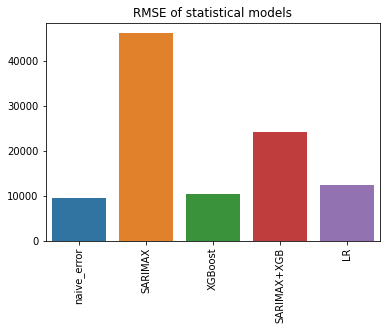

In [ ]:
results["LR"] = np.sqrt(mean_squared_error(test.txn_id.values,pred_data['Liner_Reg']))
sns.barplot(x = list(results.keys()), y=list(results.values()))
plt.title("RMSE of statistical models")
plt.xticks(rotation = 90)

In [ ]:
test = mon_txn.iloc[int(mon_txn.shape[0]*0.9):].amount.values
check = predictiondata.iloc[int(mon_txn.shape[0]*0.9):, -1].values
#print(test, check)
Accuracy=[]
for i in range(4):
  Accuracy.append(1- (abs(test[i] - check[i])/test[i]))

In [ ]:
print(Accuracy)
print("Overall Quaterly Accuracy: " + str(sum(Accuracy)/4))

[1.0, 1.0, 1.0, 1.0]
Overall Quaterly Accuracy: 1.0


(array([737425., 737546., 737669., 737791., 737911., 738034., 738156.,
        738276., 738399.]), <a list of 9 Text major ticklabel objects>)

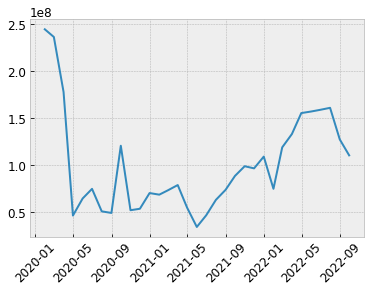

In [ ]:
sns.lineplot(x=mon_txn.index.values, y = mon_txn.amount.values)
plt.xticks(rotation=45)

#User-Level Txn

In [ ]:
data['user_id'].nunique()

24303

data.groupby('user_id')['amount']
grouped_df = data.groupby(['user_id'])[['amount', 'date']]

for key, item in grouped_df:
    print(key)
    print(grouped_df.get_group(key), "\n\n")

In [ ]:
user = data[data.user_id == 'HP201910101631166507361069HP'].groupby('date', as_index=False)['amount'].sum()
user['date'] = pd.to_datetime(user.date)

In [ ]:
usermon_txn =user.resample("M", on='date').sum()

In [ ]:
usermon_txn

#Conveyance

In [ ]:
da = data[data.expense_category == 'Visa'].groupby('date', as_index=False)['amount'].sum()
da['date'] = pd.to_datetime(da.date)

In [ ]:
txn_mon =da.resample("M", on='date').sum()

In [ ]:
txn_mon